# Importing necessary libraries

In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.naive_bayes import MultinomialNB
import nltk
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Loading the data

In [2]:
df = pd.read_csv('SPAM text message 20170820 - Data.csv')
df.head(10)

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
5,spam,FreeMsg Hey there darling it's been 3 week's n...
6,ham,Even my brother is not like to speak with me. ...
7,ham,As per your request 'Melle Melle (Oru Minnamin...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...


# checking the data

In [3]:
df.columns

Index(['Category', 'Message'], dtype='object')

In [4]:
df.shape

(5572, 2)

#checking if any null value exist in dataset

In [5]:
df.isnull().sum()
df.isna().sum()
#same as pd.isnull() for dataframesdf.isna()
#same as pd.isna() for dataframes

Category    0
Message     0
dtype: int64

# Checking if HTML tags exist

In [6]:
#checking HTML tag....

for i in df['Message'].values:
    if(len(re.findall('<.*?>', i))):
        print(i)
        print('\n')
    
    
    
    

<Forwarded from 448712404000>Please CALL 08712404000 immediately as there is an urgent message waiting for you.


<Forwarded from 88877>FREE entry into our £250 weekly comp just send the word ENTER to 88877 NOW. 18 T&C www.textcomp.com


<Forwarded from 21870000>Hi - this is your Mailbox Messaging SMS alert. You have 4 messages. You have 21 matches. Please call back on 09056242159 to retrieve your messages and matches


<Forwarded from 21870000>Hi - this is your Mailbox Messaging SMS alert. You have 40 matches. Please call back on 09056242159 to retrieve your messages and matches cc100p/min


URGENT! Your Mobile number has been awarded a <UKP>2000 prize GUARANTEED. Call 09061790125 from landline. Claim 3030. Valid 12hrs only 150ppm


PRIVATE! Your 2003 Account Statement for <fone no> shows 800 un-redeemed S. I. M. points. Call 08715203656 Identifier Code: 42049 Expires 26/10/04




# Loading the english stop words

In [7]:
stop = set(stopwords.words('english'))
print(stop)
print(type(stop))

{'mightn', 'himself', 'own', 'll', 'should', 'his', 'what', 'haven', 'from', 'those', 'yourself', 'was', 'theirs', "you're", 'is', 'as', 'before', 'each', 'will', "you've", 't', 'needn', "you'll", "hasn't", 'ourselves', 'while', 'him', 'at', 'through', 'wasn', 'itself', 'then', "you'd", 'he', 'in', 'd', 'it', 'over', 'that', "that'll", 'between', "hadn't", 'shouldn', 'myself', 'where', 'had', 'whom', 'more', 'hadn', 'only', 'we', 'were', 'such', 'their', 'here', 'she', 's', 'out', 'ma', 'they', 'these', 'hers', "it's", 'a', 've', 'been', 'below', 'and', 'weren', 'yours', 'this', 'shan', 'an', 'any', "won't", 'themselves', 'down', "aren't", "she's", 'with', 'no', 'doesn', 'hasn', 'above', 'aren', "mightn't", 'its', 'be', 'am', "doesn't", "mustn't", 'why', 'y', 'to', 'against', "shouldn't", 'which', 'me', 'few', 'other', 'so', 'them', 'ain', 'being', 'won', 'there', 'have', 'if', 'off', 'don', "don't", 'having', 'i', 'when', 'nor', 're', 'o', 'couldn', 'our', 'about', "couldn't", "wasn't

# droping the duplicates values

In [8]:
df.drop_duplicates(inplace=True)

In [9]:
df.shape

(5157, 2)

In [10]:
df['Category'].value_counts()

ham     4516
spam     641
Name: Category, dtype: int64

# Function to clean punctuation

In [11]:
def cleanpunc(sentences):
    cleaned = re.sub(r'[?|!|\'|"|#]',r'',sentences)
    cleaned = re.sub(r'[.|,|)|(|\|/]',r' ',cleaned)
    return  cleaned

# Loading the snowball stemmer

In [12]:
from nltk.stem import SnowballStemmer
sno = SnowballStemmer('english')

In [13]:
str1=' '
s=' '
i = 0
final_string = []
for wor in df['Message'].values:
    fil_wor = []
    for w in wor.split():
        for cleanedwords in cleanpunc(w).split(): #cleaning punctuation
            if(cleanedwords.isalpha() and len(cleanedwords)>2): #checking value is alpha numeric or not and we know adjective size is greater than 2
                if(cleanedwords.lower() not in stop):
                    s=(sno.stem(cleanedwords.lower())).encode('utf8') #applying stemmer and converting the character to lowercase
                    fil_wor.append(s)
    str1 = b" ".join(fil_wor) #final string of cleaned words
    #print("***********************************************************************")
    
    final_string.append(str1)
    i+=1

In [14]:
#copying the column to exixsting dataset
df['CleanedText']=final_string #adding a column of CleanedText which displays the data after pre-processing of the review


In [15]:
df

,Category,Message,CleanedText
0,ham,"Go until jurong point, crazy.. Available only ...",b'jurong point crazi avail bugi great world bu...
1,ham,Ok lar... Joking wif u oni...,b'lar joke wif oni'
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,b'free entri wkli comp win cup final tkts may ...
3,ham,U dun say so early hor... U c already then say...,b'dun say earli hor alreadi say'
4,ham,"Nah I don't think he goes to usf, he lives aro...",b'nah dont think goe usf live around though'
...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,b'time tri contact pound prize claim easi call...
5568,ham,Will ü b going to esplanade fr home?,b'go esplanad home'
5569,ham,"Pity, * was in mood for that. So...any other s...",b'piti mood suggest'
5570,ham,The guy did some bitching but I acted like i'd...,b'guy bitch act like interest buy someth els n...


# Visualizing the spam and ham words

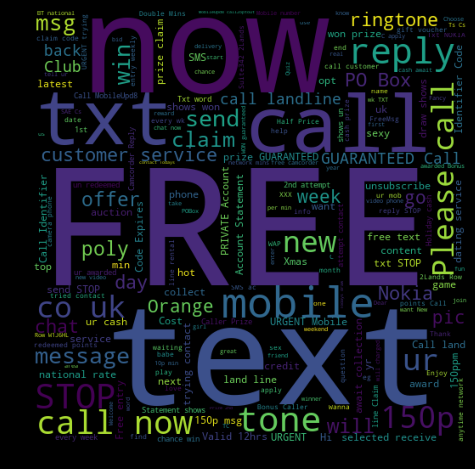

In [16]:
spam_words = ' '.join(list(df[df['Category'] == 'spam']['Message']))
spam_wc = WordCloud(width = 512, height = 512).generate(spam_words)
plt.figure(figsize = (10, 8), facecolor = 'k')
plt.imshow(spam_wc)
plt.show()

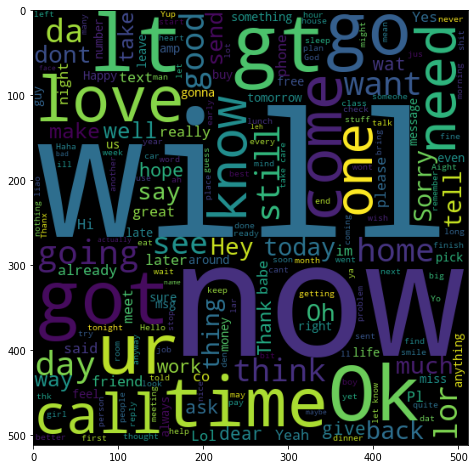

In [17]:
ham_words = ' '.join(list(df[df['Category'] == 'ham']['Message']))
ham_wc = WordCloud(width = 512, height = 512).generate(ham_words)
plt.figure(figsize = (10, 8))
plt.imshow(ham_wc)
plt.show()

In [18]:
df.columns

Index(['Category', 'Message', 'CleanedText'], dtype='object')

In [19]:
df['label'] = df['Category'].map({'ham': 0, 'spam': 1})
df

,Category,Message,CleanedText,label
0,ham,"Go until jurong point, crazy.. Available only ...",b'jurong point crazi avail bugi great world bu...,0
1,ham,Ok lar... Joking wif u oni...,b'lar joke wif oni',0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,b'free entri wkli comp win cup final tkts may ...,1
3,ham,U dun say so early hor... U c already then say...,b'dun say earli hor alreadi say',0
4,ham,"Nah I don't think he goes to usf, he lives aro...",b'nah dont think goe usf live around though',0
...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,b'time tri contact pound prize claim easi call...,1
5568,ham,Will ü b going to esplanade fr home?,b'go esplanad home',0
5569,ham,"Pity, * was in mood for that. So...any other s...",b'piti mood suggest',0
5570,ham,The guy did some bitching but I acted like i'd...,b'guy bitch act like interest buy someth els n...,0


In [20]:
#droping the Category  columns
df.drop('Category', axis=1, inplace=True)

In [21]:
#distributing the dataset into feature and label
x = df['CleanedText']
y = df['label']

In [22]:
#text is represented as the bag of its words
cv = CountVectorizer()
x = cv.fit_transform(x)

# Spliting the dataset into train and test feature and labels

In [23]:

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

# Applying Multinomial classification on traing data

In [24]:
classifier = MultinomialNB()
classifier.fit(x_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

# checking the accuracy

In [25]:

pred = classifier.predict(x_test)
print(classification_report(y_test, pred))
print()
print('Confusion Matrix:\n',confusion_matrix(y_test, pred))
print()
print('Accuracy : ',accuracy_score(y_test, pred))


              precision    recall  f1-score   support

           0       0.98      0.97      0.98       897
           1       0.81      0.90      0.85       135

    accuracy                           0.96      1032
   macro avg       0.90      0.93      0.91      1032
weighted avg       0.96      0.96      0.96      1032


Confusion Matrix:
 [[868  29]
 [ 14 121]]

Accuracy :  0.9583333333333334


# Applying KNN  and checking accuracy

In [26]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(x_train, y_train)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [27]:
pred = neigh.predict(x_test)
print(classification_report(y_test, pred))
print()
print('Confusion Matrix:\n',confusion_matrix(y_test, pred))
print()
print('Accuracy : ',accuracy_score(y_test, pred))


              precision    recall  f1-score   support

           0       0.92      1.00      0.96       897
           1       1.00      0.43      0.60       135

    accuracy                           0.93      1032
   macro avg       0.96      0.71      0.78      1032
weighted avg       0.93      0.93      0.91      1032


Confusion Matrix:
 [[897   0]
 [ 77  58]]

Accuracy :  0.9253875968992248


# Applying SVM and checking its accuracy

In [28]:
from sklearn import svm
svm = svm.SVC()
svm.fit(x_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [29]:
pred = svm.predict(x_test)
print(classification_report(y_test, pred))
print()
print('Confusion Matrix:\n',confusion_matrix(y_test, pred))
print()
print('Accuracy : ',accuracy_score(y_test, pred))


              precision    recall  f1-score   support

           0       0.97      1.00      0.98       897
           1       0.98      0.77      0.86       135

    accuracy                           0.97      1032
   macro avg       0.97      0.88      0.92      1032
weighted avg       0.97      0.97      0.97      1032


Confusion Matrix:
 [[895   2]
 [ 31 104]]

Accuracy :  0.9680232558139535
